In [12]:
%reload_ext autoreload
%autoreload 2

In [ ]:
# Raskite 5 top 2014 metais apmokamas specialybes, atvaizduokite jų vidutinį atlyginimą stulpeline diagrama
# (bar arba barh).
# Raskite 5 mažiausiai apmokamas specialybes 2014 metais,
# atvaizduokite jų vidutinį atlyginimą su bar arba barh.
# Raskite 5 vidutiniškai apmokamas specialybes 
# (0.9-1.1 VDU, imate arčiausiai 1.1 VDU esančias),
# atvaizduojate vidutinius atlyginimas su bar arba barh.
# Tada surandate šių 15-kos specialybių atlyginimų pokytį tarp 2014 ir 2018 metų,
# pokytį vizualizuokite su bar arba barh. Kokios specialybėsm tas pokytis didžiausias?
# Vietoj kodų - profesijų normalus pavadinimas!

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

from manofunkcijos import *

In [2]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [17]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
with
T1 as((select round(avg(bdu_spalio/3.4528)) as alga14, profesija as kod from DUS2014N
group by kod
order by alga14 desc
limit 5)
union all
(select round(avg(bdu_spalio/3.4528)) as alga14, profesija as kod from DUS2014N
group by kod
having alga14 between (select avg(bdu_spalio/3.4528) *0.9 from DUS2014N) and (select avg(bdu_spalio/3.4528) *1.1 from DUS2014N)
order by alga14 desc
limit 5)
union all
(select round(avg(bdu_spalio/3.4528)) as alga14, profesija as kod from DUS2014N
group by kod
order by alga14 asc
limit 5)), 
T2 as (select Kodas as kod, Profesija as prof from profesijos)
select * from T1 join T2 using (kod)
order by alga desc;
"""
C.execute(sql)
ans = C.fetchall()
kodas, alga14, prof14 = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |      133       |     1668.0     |Informacinių tec|
| 1 |      111       |     1606.0     |Teisės aktų leid|
| 2 |      315       |     1429.0     |Laivų ir orlaivi|
| 3 |      122       |     1381.0     |Pardavimo, rinko|
| 4 |      134       |     1355.0     |Profesionaliųjų |
| 5 |      511       |     742.0      |Kelionių palydov|
| 6 |      835       |     722.0      |Laivų įgulų nari|
| 7 |      311       |     713.0      |Fizinių mokslų i|
| 8 |      722       |     711.0      |Kalviai, įrankin|
| 9 |      721       |     705.0      |Skardininkai, me|
|10 |      612       |     313.0      |Gyvūnų augintoja|
|11 |      521       |     309.0      |Gatvės prekystal|
|12 |      516       |     290.0      |Kiti paslaugų as|
|13 |      911       |     278.0      |Namų, viešbučių |
|14 |      514       |     263.0      |Kirpėjai, kosmet|


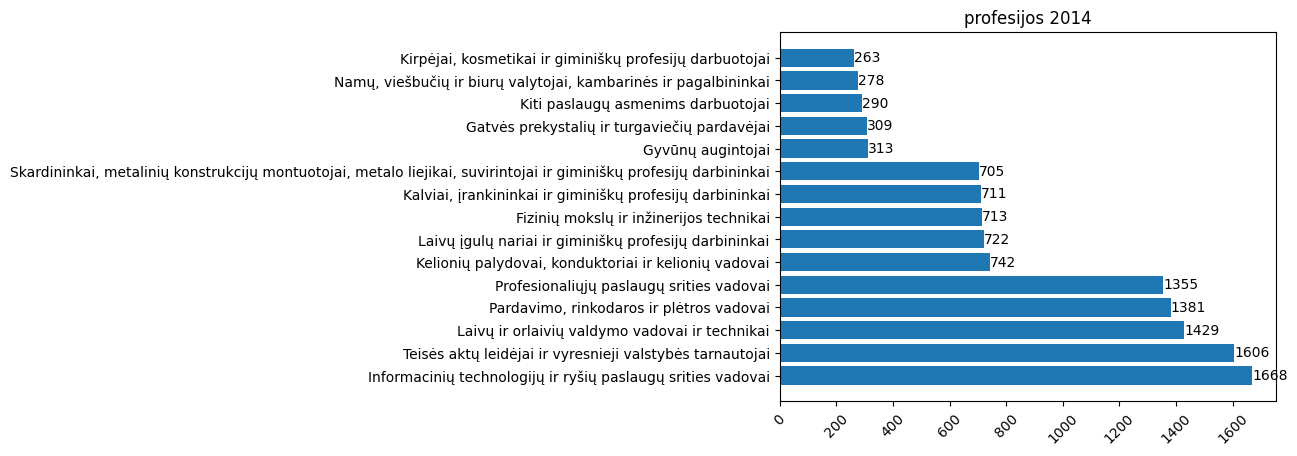

In [20]:
fig, axis = plt.subplots()

B1 = axis.barh(prof14, alga14)
axis.tick_params(axis='x', rotation=45)
axis.bar_label(B1)

plt.title('profesijos 2014')
# plt.tight_layout()
plt.show()

In [21]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
with 
	T14 as
    (with
T1 as((select round(avg(bdu_spalio/3.4528)) as alga14, profesija as kod from DUS2014N
group by kod
order by alga14 desc
limit 5)
union all
(select round(avg(bdu_spalio/3.4528)) as alga14, profesija as kod from DUS2014N
group by kod
having alga14 between (select avg(bdu_spalio/3.4528) *0.992 from DUS2014N) and (select avg(bdu_spalio/3.4528) *1.008 from DUS2014N)
order by alga14 desc
limit 5)
union all
(select round(avg(bdu_spalio/3.4528)) as alga14, profesija as kod from DUS2014N
group by kod
order by alga14 asc
limit 5)), 
T2 as (select Kodas as kod, Profesija as prof from profesijos)
select * from T1 join T2 using (kod)),
	T18 as
    (select round(avg(bdu_spalio)) as alga18, profesija as kod from DUS2018N
    group by kod)
select prof, (alga18-alga14)/alga14*100.0 as pokytis from T14 join T18 using (kod)
order by pokytis desc;
"""
C.execute(sql)
ans = C.fetchall()
prof, pokytis = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |Kirpėjai, kosmet|    84.0304     |
| 1 |Gyvūnų augintoja|    73.1629     |
| 2 |Laivų ir orlaivi|    58.7124     |
| 3 |Kiti paslaugų as|    50.3448     |
| 4 |Namų, viešbučių |    44.6043     |
| 5 |Elektroninės ir |    32.6055     |
| 6 |Gatvės prekystal|    32.3625     |
| 7 |Pardavimo, rinko|    31.7161     |
| 8 |Materialinių ver|    31.0496     |
| 9 |Informacinių tec|     28.717     |
|10 |Spausdinimo darb|    25.5848     |
|11 |Profesionaliųjų |    22.7306     |
|12 |Teisės aktų leid|     6.4134     |


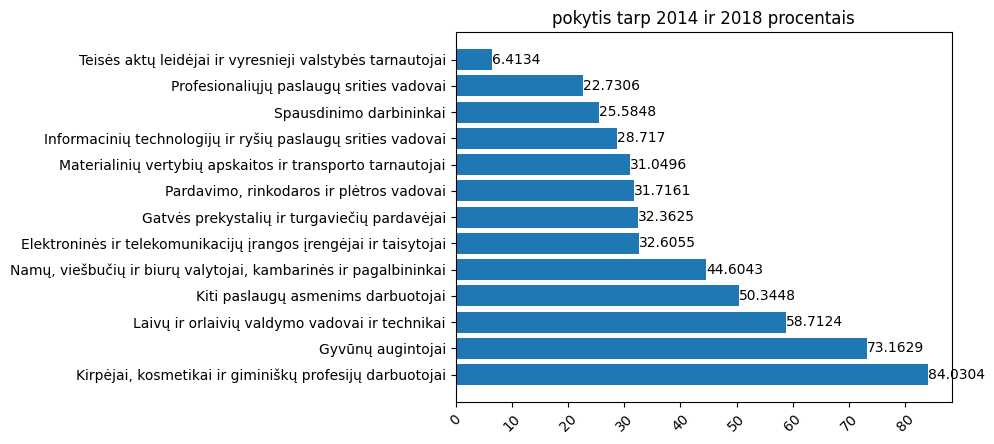

In [23]:
fig, axis = plt.subplots()

B1 = axis.barh(prof, pokytis)
axis.tick_params(axis='x', rotation=45)
axis.bar_label(B1)

plt.title('pokytis tarp 2014 ir 2018 procentais')
# plt.tight_layout()
plt.show()

In [ ]:
# -- Pateikite lentelę, kurioje būtų vidutinė kaina jūsų pasirinktam ploto intervalui
# -- pavyzdžiui, suskirstote butų plotus 5 kv m intervalais, ir suraskite vidutinę kainą tam intervalui.
# -- Ar kaina yra linkusi didėti, didėjant plotui?




In [24]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select plotas, round(avg(price), 2) as P
from
(select 
ceil(cast(Plotas as float) / 5) * 5
as plotas,
cast(replace(`€/S`, '€/m²', '') as float) as price
from aruodas)
as T
group by plotas;
"""
C.execute(sql)
ans = C.fetchall()
plotas, kaina = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

Rodoma 20 eilutės iš 50
| 0 |      10.0      |    2425.67     |
| 1 |      15.0      |     3404.5     |
| 2 |      20.0      |    2997.11     |
| 3 |      25.0      |     3180.7     |
| 4 |      30.0      |    3109.15     |
| 5 |      35.0      |     3199.9     |
| 6 |      40.0      |    3474.15     |
| 7 |      45.0      |     3364.7     |
| 8 |      50.0      |    3122.49     |
| 9 |      55.0      |    3321.39     |
|10 |      60.0      |    3356.68     |
|11 |      65.0      |    2878.93     |
|12 |      70.0      |    2978.45     |
|13 |      75.0      |    3238.31     |
|14 |      80.0      |    2923.33     |
|15 |      85.0      |    3836.78     |
|16 |      90.0      |    3346.73     |
|17 |      95.0      |    3717.77     |
|18 |     100.0      |    3715.67     |
|19 |     105.0      |    4799.23     |


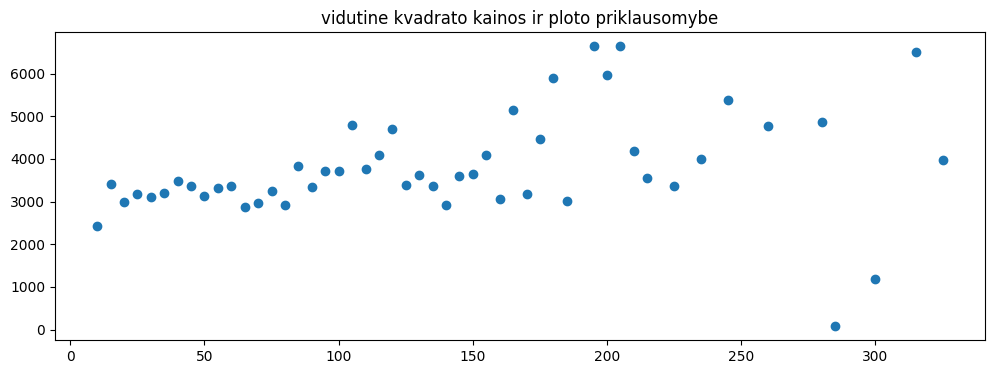

In [31]:
fig, axis = plt.subplots(figsize=(12,4))

B1 = axis.scatter(plotas, kaina)
# axis.bar_label(B1)

plt.title('vidutine kvadrato kainos ir ploto priklausomybe')
plt.show()

In [ ]:
# -- Ar vidutinė kaina priklauso nuo kambarių skaičiaus?

In [32]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select Kambariai, round(avg(price), 2) as P
from
(select 
Kambariai,
cast(replace(`€/S`, '€/m²', '') as float) as price
from aruodas)
as T
group by Kambariai;
"""
C.execute(sql)
ans = C.fetchall()
kamb, kaina = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |       1        |    3073.57     |
| 1 |       2        |     3315.5     |
| 2 |       3        |    3288.02     |
| 3 |       4        |    3507.56     |
| 4 |       5        |    3590.28     |
| 5 |       6        |    3940.75     |
| 6 |       7        |     2741.0     |
| 7 |       8        |     2937.6     |
| 8 |       16       |     1174.0     |


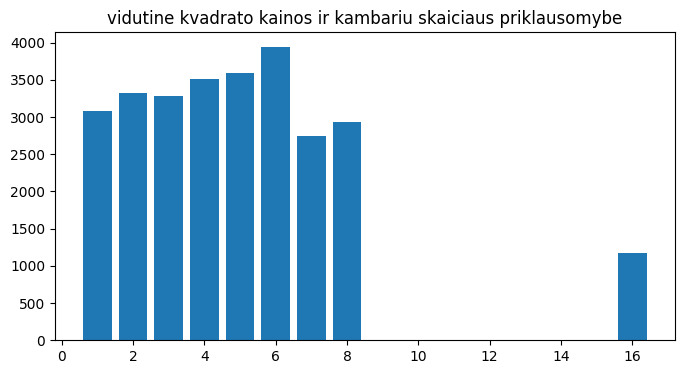

In [36]:
fig, axis = plt.subplots(figsize=(8,4))

B1 = axis.bar(kamb, kaina)
# axis.bar_label(B1)

plt.title('vidutine kvadrato kainos ir kambariu skaiciaus priklausomybe')
plt.show()

# axis.text(x,y, 'tekstas')

In [ ]:
# -- kokie eismo įvykiai sudarė top5? Pateikite procentinę vizualizaciją (pie chart).
# Lentelė EismIvyk2020, stulpelis schema1. 
# -- pateikite šių eismo įvykių pokytį tarp 2020 ir 2021 metų, procentais, barh grafiku.

In [37]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
with 
T1 as
(select schema1 as ivykiai, count(*) as C20
from EismIvyk2020
group by ivykiai),
T2 as
(select schema1 as ivykiai, count(*) as C21
from EismIvyk2021
group by ivykiai)
select *, round((C21-C20)/C20*100, 2) as pokytis from T1 join T2 using (ivykiai)
order by pokytis desc;
"""
C.execute(sql)
ans = C.fetchall()
ivykiai, kiekis20, kiekis21, pokytis  = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |Priešpriešiniai |      762       |      916       |     20.21      |
| 1 |Kiti eismo įvyki|     10492      |     11496      |      9.57      |
| 2 |Nuvažiavimai nuo|      2464      |      2547      |      3.37      |
| 3 |Susidūrimas suka|      421       |      432       |      2.61      |
| 4 |Užvažiavimas ant|      383       |      388       |      1.31      |
| 5 |Susidūrimai suka|      880       |      881       |      0.11      |
| 6 |Susidūrimai juda|      2248      |      2243      |     -0.22      |
| 7 |Kiti susidūrimai|      4891      |      4398      |     -10.08     |
| 8 |Užvažiavimas ant|      481       |      406       |     -15.59     |


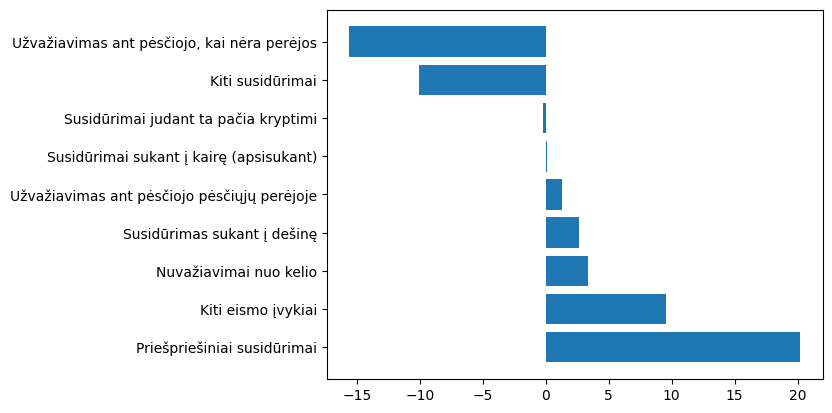

In [43]:
fig, axis = plt.subplots()

B1 = axis.barh(ivykiai, pokytis)

plt.show()